# initialization

In [4]:
from safedigital import temperature as tr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set(color_codes=True)


# Data washing
## Day 1 : 20230403

In [2]:
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\08_NGTR Test\20230403_TR_SA12kV_SGCC_D=V_NGTR_630A'
path_mdc4 = cur_dir + '\\' + '0_Data original' + '\\' + 'MDC4_M_TR_Data_20230403.csv'
path_thermal_couple = cur_dir + '\\' + '0_Data original' + '\\' + '2023-04-03_thermal_couple.csv'
path_measure_point = cur_dir + '\\' + '0_Data original'  + '\\'  + '20230404_config.json'
path_washed = cur_dir + '\\' + '1_Data formatted' + '\\' + '2023-04-03_data_washed_1min.csv'
raw_data_mdc4 = tr.DataClean.read_logger_data_simple(path_mdc4)
raw_data_thermal_couple = tr.DataClean.read_couple_datetime(path_thermal_couple)
sync_data_df = tr.DataClean.synch_logger_couple_resample(raw_data_mdc4, raw_data_thermal_couple, sample_time='1min')
with open(path_measure_point, 'r') as f:
    config = json.load(f)
sync_data_df = sync_data_df.rename(columns=config)
print(sync_data_df.columns)
sync_data_df.to_csv(path_washed)

MDC4-M & thermal couples common start datetime : 2023-04-03 13:57:00
MDC4-M & thermal couples common end datetime : 2023-04-03 16:49:00
Index(['Env_T', 'Env_H', 'Unit1_A_T', 'Unit1_B_T', 'Unit1_A_T', 'Unit2_A_T',
       'Unit2_B_T', 'Unit2_C_T', 'Unit1_A_Cur', 'Unit1_B_Cur',
       ...
       'cable_top_B', 'cable_top_C', 'cable_bushing_V2_A',
       'cable_bushing_V2_B', 'cable_bushing_V2_C', 'ch56', 't_oil_bottle_4',
       't_oil_bottle_3', 't_oil_bottle_2', 't_oil_bottle_1'],
      dtype='object', length=108)


## Day 2 : 20230404

In [8]:
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\08_NGTR Test\20230404_TR_SA12kV_SGCC_D=V_NGTR_630A_Full day'
path_mdc4 = cur_dir + '\\' + '0_Data original' + '\\' + 'MDC4_M_TR_Data_20230404.csv'
path_thermal_couple = cur_dir + '\\' + '0_Data original' + '\\' + '2023-04-04_thermal_couple.csv'
path_measure_point = cur_dir + '\\' + '0_Data original'  + '\\'  + '20230404_config.json'
path_washed = cur_dir + '\\' + '1_Data formatted' + '\\' + '2023-04-04_data_washed_1min.csv'
raw_data_mdc4 = tr.DataClean.read_logger_data_simple(path_mdc4)
raw_data_thermal_couple = tr.DataClean.read_couple_datetime(path_thermal_couple)
sync_data_df = tr.DataClean.synch_logger_couple_resample(raw_data_mdc4, raw_data_thermal_couple, sample_time='1min')
with open(path_measure_point, 'r') as f:
    config = json.load(f)
sync_data_df = sync_data_df.rename(columns=config)
print(sync_data_df.columns)
sync_data_df.to_csv(path_washed)

MDC4-M & thermal couples common start datetime : 2023-04-04 09:34:00
MDC4-M & thermal couples common end datetime : 2023-04-04 16:37:00
Index(['t_env', 'hum_env', 'Unit1_A_T', 'Unit1_B_T', 'Unit1_A_T', 'Unit2_A_T',
       'Unit2_B_T', 'Unit2_C_T', 'Unit1_A_Cur', 'Unit1_B_Cur',
       ...
       'cable_top_B', 'cable_top_C', 'cable_bushing_V2_A',
       'cable_bushing_V2_B', 'cable_bushing_V2_C', 'ch56', 't_oil_bottle_4',
       't_oil_bottle_3', 't_oil_bottle_2', 't_oil_bottle_1'],
      dtype='object', length=108)


# Data previewing
## Day 1

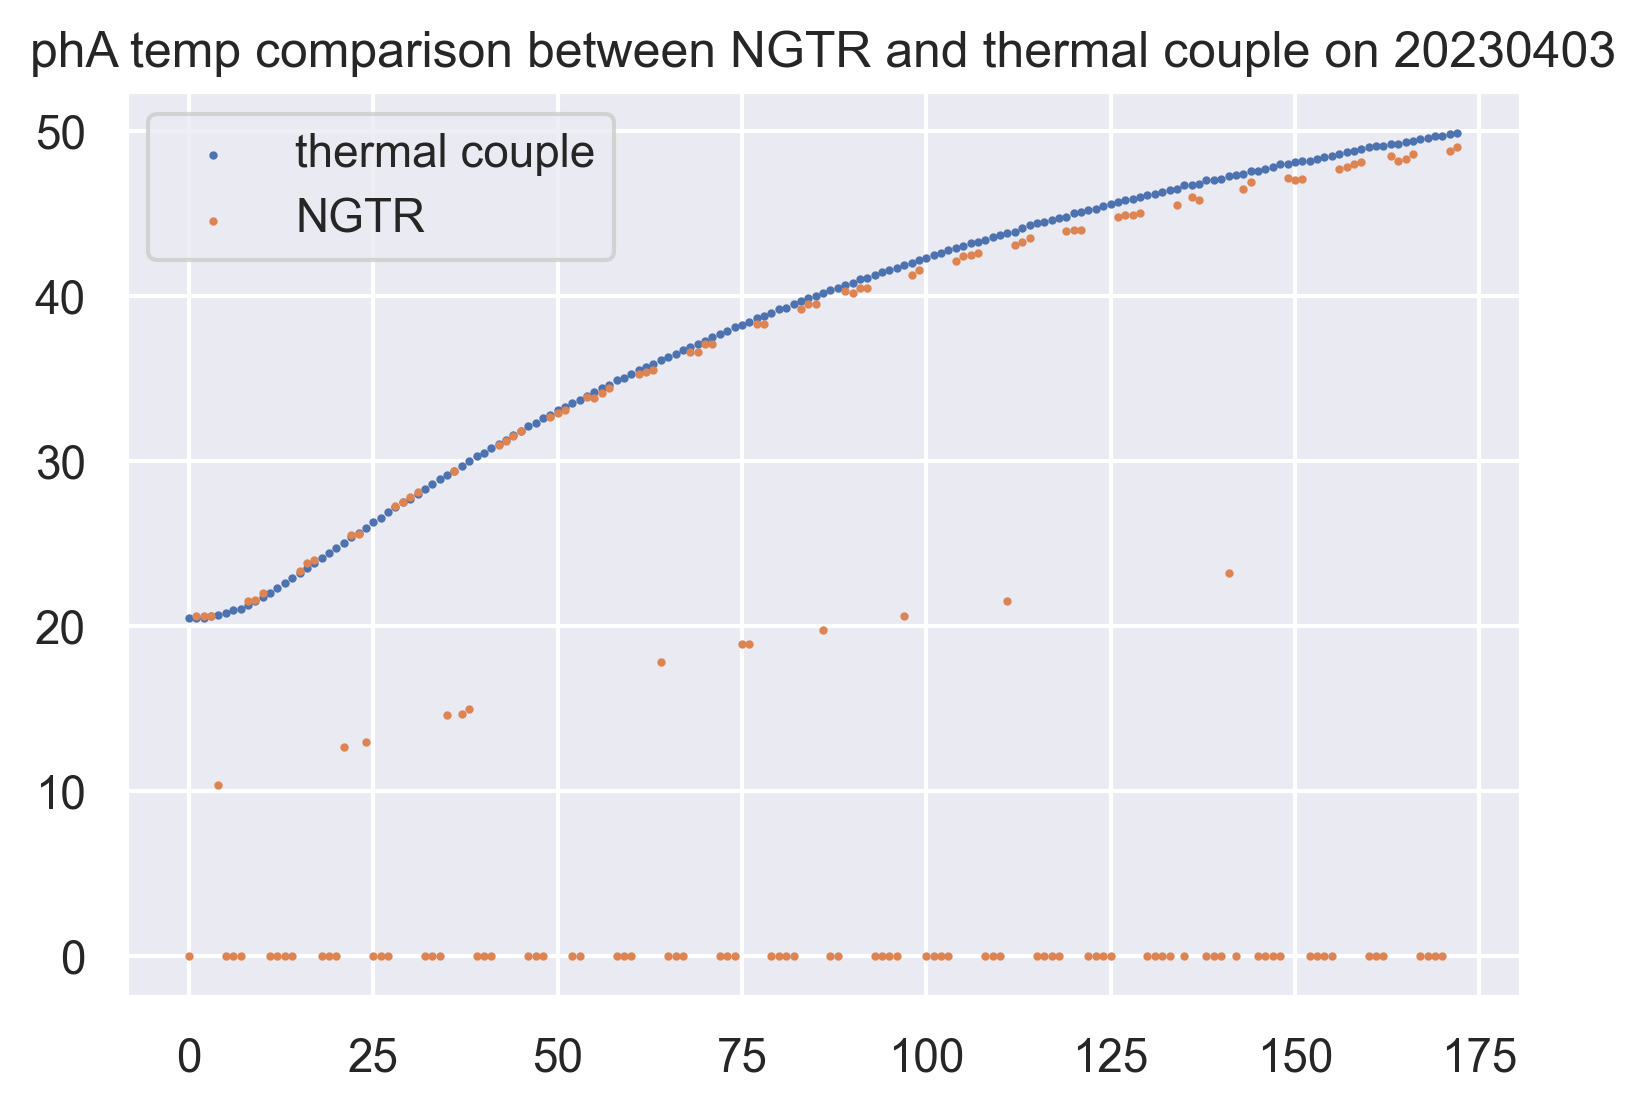

In [15]:
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\08_NGTR Test\20230403_TR_SA12kV_SGCC_D=V_NGTR_630A'
path_washed = cur_dir + '\\' + '1_Data formatted' + '\\' + '2023-04-03_data_washed_1min.csv'
data_df = pd.read_csv(path_washed, header=0)
data_df.index = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in data_df.iloc[:, 0]]
data_df['cable_bushing_V2_A'] = data_df['cable_bushing_V2_A'] + data_df['t_oil_bottle_1']
data_df['error_phA'] = data_df['cable_bushing_V2_A'] - data_df['Unit1_A_T']

# plot raw data

plt.subplots(dpi=300)
# plt.subplot(2,1,1)
plt.title('phA temp comparison between NGTR and thermal couple on 20230403')
plt.scatter(np.arange(len(data_df)), data_df['cable_bushing_V2_A'], s=1, label='thermal couple')
plt.scatter(np.arange(len(data_df)), data_df['Unit1_A_T'], s=1, label='NGTR')
plt.legend()
# plt.subplot(2,1,2)
# plt.scatter(np.arange(len(data_df)), data_df['error_phA'], s=1, label = 'error')
# plt.legend()

# interpolation zeros
# data_df['Unit1_A_T_inter'] = tr.DataClean.interp_zero(data_df['Unit1_A_T'])
# # plt.figure()
# plt.subplots(dpi=300)
# plt.subplot(2,1,1)
# plt.plot(data_df['cable_bushing_V2_A'])
# plt.plot(data_df['Unit1_A_T'])
# plt.subplot(2,1,2)
# plt.plot(data_df['error_phA'])


## Day 2

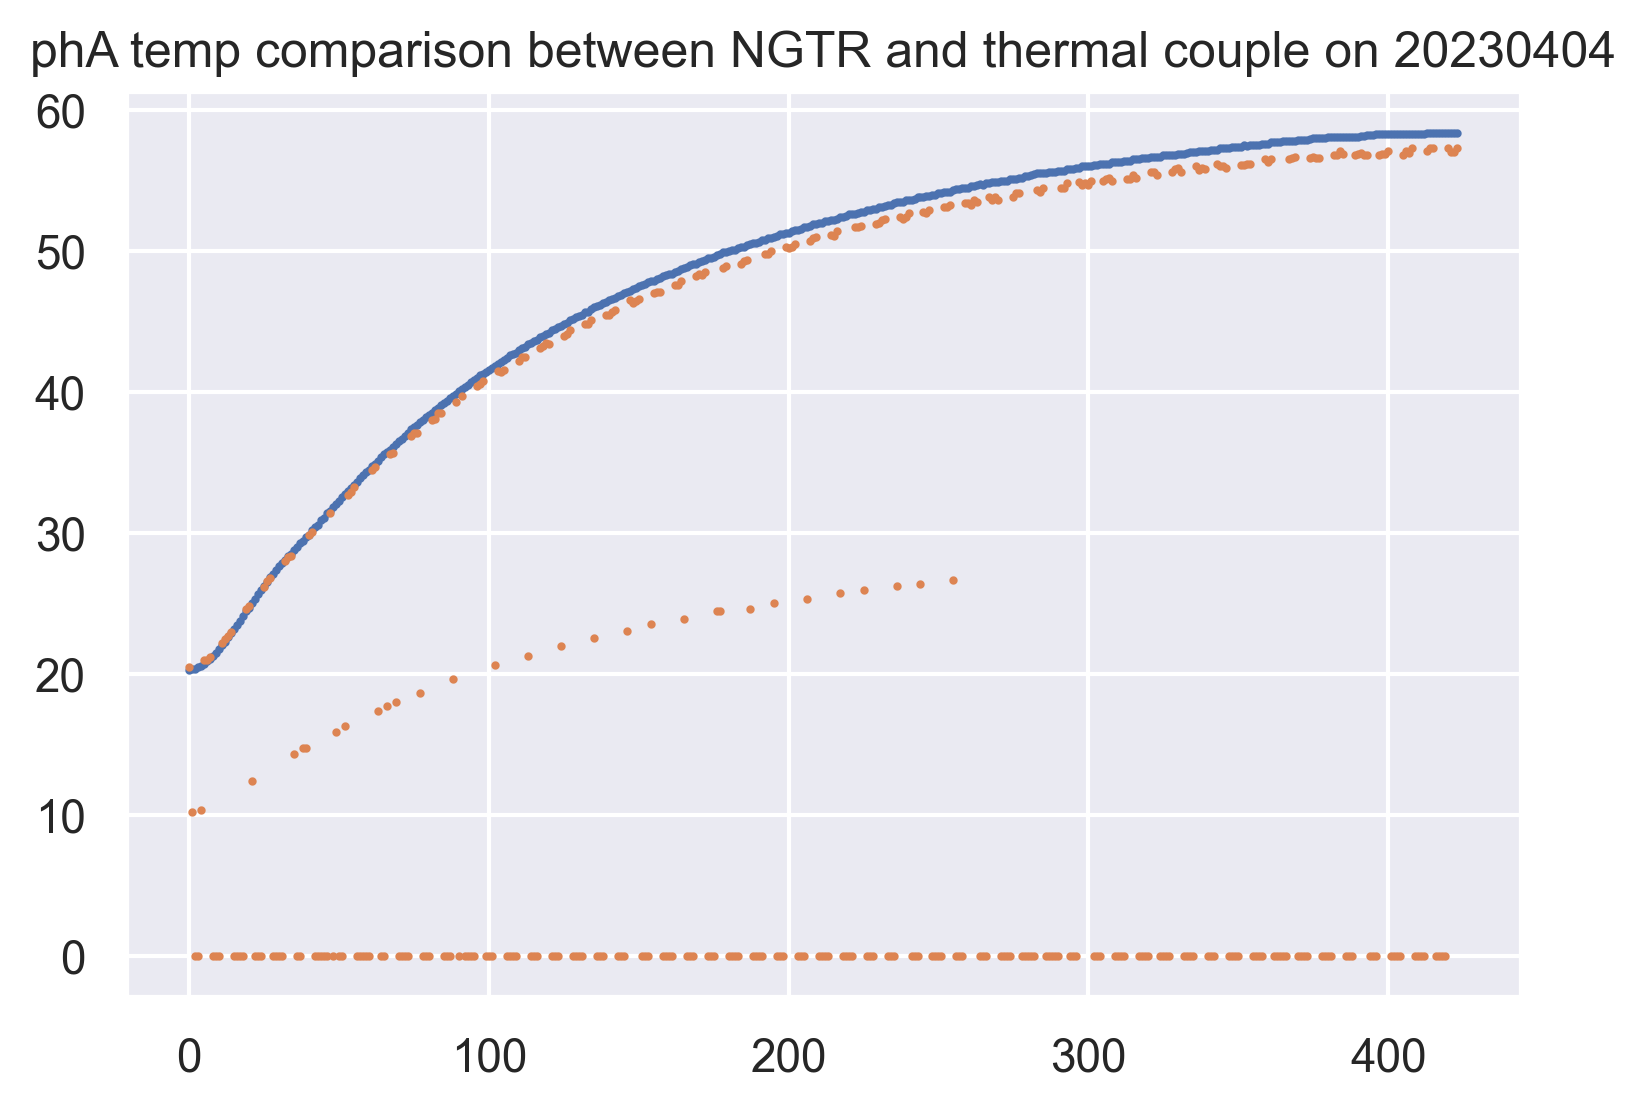

In [11]:
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\08_NGTR Test\20230404_TR_SA12kV_SGCC_D=V_NGTR_630A_Full day'
path_washed = cur_dir + '\\' + '1_Data formatted' + '\\' + '2023-04-04_data_washed_1min.csv'
data_df = pd.read_csv(path_washed, header=0)
data_df.index = [datetime.strptime(i,'%Y-%m-%d %H:%M:%S') for i in data_df.iloc[:, 0]]
data_df['cable_bushing_V2_A'] = data_df['cable_bushing_V2_A'] + data_df['t_oil_bottle_1']

plt.figure(dpi=300)
plt.title('phA temp comparison between NGTR and thermal couple on 20230404')
plt.scatter(np.arange(len(data_df)), data_df['cable_bushing_V2_A'], s=1, label='thermal couple')
plt.scatter(np.arange(len(data_df)), data_df['Unit1_A_T'], s=1, label='NGTR')
plt.legend()